O objetivo do código aqui é experimentar a biblioteca `skforecast`

In [1]:
import pandas as pd
import utils
import numpy as numpy
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from sktime.split import temporal_train_test_split

In [10]:
def index_to_datetime(df: pd.DataFrame) -> pd.DataFrame:
    import warnings
    print("Teste")
    warnings.warn("Utilize a função 'index_to_period'.", DeprecationWarning, stacklevel=2)
    df['month'] = df['month'].map(utils.parse_date)
    df['month'] = pd.to_datetime(df['month'], format="%Y-%m")
    df = df.set_index('month')
    df = df.asfreq(pd.infer_freq(df.index))
    return df

In [19]:
df = pd.read_csv("dados/dados_transformados.csv", sep=";", decimal=",")
df = index_to_datetime(df)
df

Teste


C:\Users\asfra\AppData\Local\Temp\ipykernel_8820\3391382065.py:2: DeprecationWarning: Utilize a função 'index_to_period'.
  df = index_to_datetime(df)


,ipca,ipca_15,selic,m1,m2,m3,m4,ibovespa,cambio,cambio_real,...,result_primario,el_nino,epu_br,epu_usa,ind_conf_cons,desemprego,rendimento,crb_cmdt,crb_food,crb_metal
month,,,,,,,,,,,,,,,,,,,,,
2004-01-01,0.76,0.68,-0.548387,-11559013.0,-22319905.0,-18028683.0,-17053471.0,-384.95,-0.0735,-0.363,...,2481.49,0.4,49.609174,-2.34359,8.9,14.696341,348.7366,7.70,18.70,15.10
2004-02-01,0.61,0.90,0.000000,1650795.0,11117714.0,1275340.0,-2131936.0,-96.42,0.0785,1.699,...,29.00,0.3,121.394093,1.00000,-0.8,15.073171,0.0000,10.11,14.74,24.27
2004-03-01,0.47,0.40,-0.112903,-1575433.0,-1282702.0,300227.0,-4199993.0,387.24,-0.0248,-2.777,...,2375.73,0.2,-166.416169,-5.00000,-10.1,16.078049,-10382.5684,4.04,2.71,10.95
2004-04-01,0.37,0.21,-0.270430,539382.0,-378329.0,-4736024.0,-2778970.0,-2535.03,0.0005,-1.562,...,-1911.68,0.2,21.276658,-4.00000,-5.3,16.454878,-339.4192,-0.45,6.35,-11.13
2004-05-01,0.51,0.54,-0.116667,1252881.0,13051576.0,26890443.0,11143701.0,-62.56,0.1944,4.213,...,1488.90,0.2,14.892162,17.00000,16.2,15.324390,238.2590,-5.31,-15.02,8.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-01,0.23,0.51,0.000000,-23521679.0,37144204.0,-60304921.0,-53107060.0,3903.44,-0.0369,-0.740,...,-17179.69,0.5,-66.227511,40.00000,-2.9,8.300000,658.0000,-6.00,4.55,-69.98
2023-06-01,-0.08,0.04,0.000000,10468536.0,35565946.0,178689253.0,102168255.0,9751.93,-0.1312,-0.920,...,-63293.21,0.8,31.459478,-26.00000,3.1,8.000000,2543.0000,6.38,11.08,5.69
2023-07-01,0.12,-0.07,0.000000,28855151.0,-22727138.0,-55577408.0,-34962544.0,3855.98,-0.0508,0.410,...,-56249.84,1.1,-35.572412,-46.00000,-0.8,7.900000,2429.0000,16.02,23.65,28.36


In [36]:
steps = 79
y = df['ipca']
X = df.drop(columns=['ipca'])
X = X.asfreq(pd.infer_freq(X.index))
y_train = y.iloc[:-steps]
y_test = y.iloc[-steps:]
X_train = X.iloc[:-steps, :]
X_test = X.iloc[-steps:, :]
X_test

,ipca_15,selic,m1,m2,m3,m4,ibovespa,cambio,cambio_real,ind_varejo,...,result_primario,el_nino,epu_br,epu_usa,ind_conf_cons,desemprego,rendimento,crb_cmdt,crb_food,crb_metal
month,,,,,,,,,,,,,,,,,,,,,
2017-03-01,0.15,-0.589286,-8574954.0,1089968.0,54465941.0,55558758.0,-1678.04,0.0237,0.17,4.37002,...,-403.43,0.1,305.349929,-23.0,-4.4,13.9,300.0,-1.62,-12.73,33.27
2017-04-01,0.21,-0.600000,2300124.0,3662217.0,-112419293.0,-85962359.0,419.18,0.0083,1.08,0.12245,...,2726.48,0.2,-126.786438,3.0,-0.4,13.7,-184.0,-6.45,-2.27,-38.56
2017-05-01,0.24,-0.400000,-1033800.0,18326792.0,53421840.0,32989414.0,-2691.77,0.0733,1.90,1.27321,...,-12611.10,0.3,-142.309334,-28.0,-5.5,13.4,967.0,9.66,16.07,5.07
2017-06-01,0.16,-1.000000,7045469.0,1375049.0,2786619.0,9444237.0,188.50,0.0859,2.33,-1.22323,...,-9490.97,0.3,-176.889236,-9.0,-3.4,13.1,632.0,12.43,25.47,12.07
2017-07-01,-0.18,-0.161290,-49041.0,-39645652.0,1148696.0,-31582563.0,3020.39,-0.0893,-0.40,1.02892,...,-3321.78,0.1,36.229386,20.0,4.7,12.9,1072.0,-4.89,-9.87,17.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-01,0.51,0.000000,-23521679.0,37144204.0,-60304921.0,-53107060.0,3903.44,-0.0369,-0.74,1.75850,...,-17179.69,0.5,-66.227511,40.0,-2.9,8.3,658.0,-6.00,4.55,-69.98
2023-06-01,0.04,0.000000,10468536.0,35565946.0,178689253.0,102168255.0,9751.93,-0.1312,-0.92,-2.28240,...,-63293.21,0.8,31.459478,-26.0,3.1,8.0,2543.0,6.38,11.08,5.69
2023-07-01,-0.07,0.000000,28855151.0,-22727138.0,-55577408.0,-34962544.0,3855.98,-0.0508,0.41,3.11000,...,-56249.84,1.1,-35.572412,-46.0,-0.8,7.9,2429.0,16.02,23.65,28.36


In [37]:
forecaster = ForecasterAutoreg(
    regressor=RandomForestRegressor(max_features="sqrt"),
    lags=12
)

forecaster.fit(y=y_train, exog=X_train)

In [38]:
y_pred = forecaster.predict(steps=steps, exog=X_test)

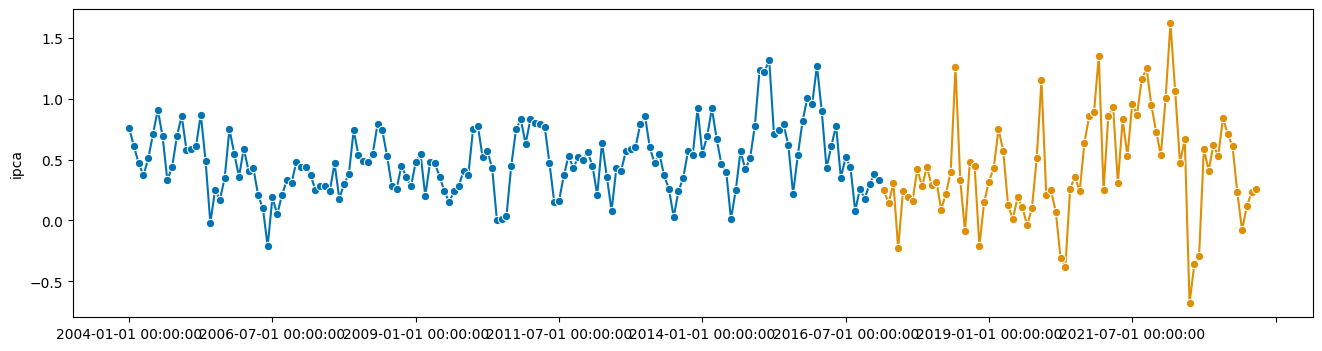

In [39]:
from sktime.utils.plotting import plot_series

labels = ['y_train', 'y_test', 'y_pred']
fig, ax = plot_series(y_train, y_test, y_pred, labels=labels)